In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
from sklearn.metrics import silhouette_score

In [3]:
#set matplotlib parameters
mp.rc_file_defaults()
rc = {'axes.facecolor':'black','grid.color': '.8',}
plt.rcParams.update(rc)

#set seaborn color palette
sns.set_palette(sns.color_palette("RdPu", 6))
palette = ["#fcd7d3","#faabb8","#f667a0","#cd238e","#cd238e"]

# Data Loading 

In [4]:
DF = pd.read_csv("marketing_campaign.csv",sep="\t")
print("Data loaded with", len(DF), "rows")
DF.head()

Data loaded with 2240 rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
DF.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
DF.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Creating Categorical DataFrame
categorical_DF = DF.select_dtypes('O')
categorical_DF.head()

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


In [9]:
# Creating Numerical DataFrame
Numerical_DF = DF.select_dtypes(('int', 'float'))
Numerical_DF.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [10]:
# Create a list of Categorical and Numerical Feature from categorical_df and numerical_df
Categorical_features = categorical_DF.columns
Numerical_features = Numerical_DF.columns
print(Categorical_features)
print(Numerical_features)
# for col in Categorical_features:
#      DF[col]=DF[col].str.replace(',','.') 
# for i in range(0,len(Categorical_features)):
#     DF.iloc[:,i] = pd.to_numeric(DF.iloc[:,i],errors='ignore')

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


In [11]:
#drop un-needed columns
DF.drop(['ID','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
#drop rows with missing values
DF.dropna(inplace=True)
#change date format
DF["Dt_Customer"]= pd.to_datetime(DF["Dt_Customer"])

In [12]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-nul

# Data Transorfmation

In [13]:
#examining categorical data
print("Education Values:", DF["Education"].unique())
print("Marital_Status Values:", DF["Marital_Status"].unique())

Education Values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [14]:
#give each feature a smaller set of values
edu= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
DF["Education"]= DF["Education"].replace(edu)

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Taken", "Married": "Taken"}
DF["Marital_Status"]= DF["Marital_Status"].replace(status)

#new values
print("Education Values: ", DF["Education"].unique())
print("Marital_Status Values:", DF["Marital_Status"].unique())

Education Values:  ['Graduate' 'Postgraduate' 'Undergraduate']
Marital_Status Values: ['Single' 'Taken']


In [15]:
#finding customer age
DF["Age"]= datetime.now().year-DF["Year_Birth"]

#finding family size and number of children
DF["Children_Count"]= DF["Kidhome"]+DF["Teenhome"]
DF["Family_Size"]= 1+DF["Children_Count"]+DF["Marital_Status"].replace({"Taken": 1, "Single": 0})

#finding number of days since person became a customer
DF["Customer_For"]= (datetime.now()-DF["Dt_Customer"]).dt.days

#finding total spendings of customer
DF["Spendings"]= DF["MntWines"]+DF["MntFruits"]+DF["MntFishProducts"]+DF["MntMeatProducts"]+DF["MntSweetProducts"]+DF["MntGoldProds"]

#finding total number of purchases of customer
DF["Purchases"]= DF["NumDealsPurchases"]+DF["NumWebPurchases"]+DF["NumCatalogPurchases"]+DF["NumStorePurchases"]

#finding total number of accepted campaigns
DF["Accepted_Campaigns"]= DF["AcceptedCmp1"]+DF["AcceptedCmp2"]+DF["AcceptedCmp3"]+DF["AcceptedCmp4"]+DF["AcceptedCmp5"]

#dropping un-needed columns
DF= DF.drop(["Year_Birth","Dt_Customer"],axis=1)
DF= DF.drop(["Kidhome","Teenhome"],axis=1)

In [16]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Recency              2216 non-null   int64  
 4   MntWines             2216 non-null   int64  
 5   MntFruits            2216 non-null   int64  
 6   MntMeatProducts      2216 non-null   int64  
 7   MntFishProducts      2216 non-null   int64  
 8   MntSweetProducts     2216 non-null   int64  
 9   MntGoldProds         2216 non-null   int64  
 10  NumDealsPurchases    2216 non-null   int64  
 11  NumWebPurchases      2216 non-null   int64  
 12  NumCatalogPurchases  2216 non-null   int64  
 13  NumStorePurchases    2216 non-null   int64  
 14  NumWebVisitsMonth    2216 non-null   int64  
 15  AcceptedCmp3         2216 non-null   i

# Outlier Removal

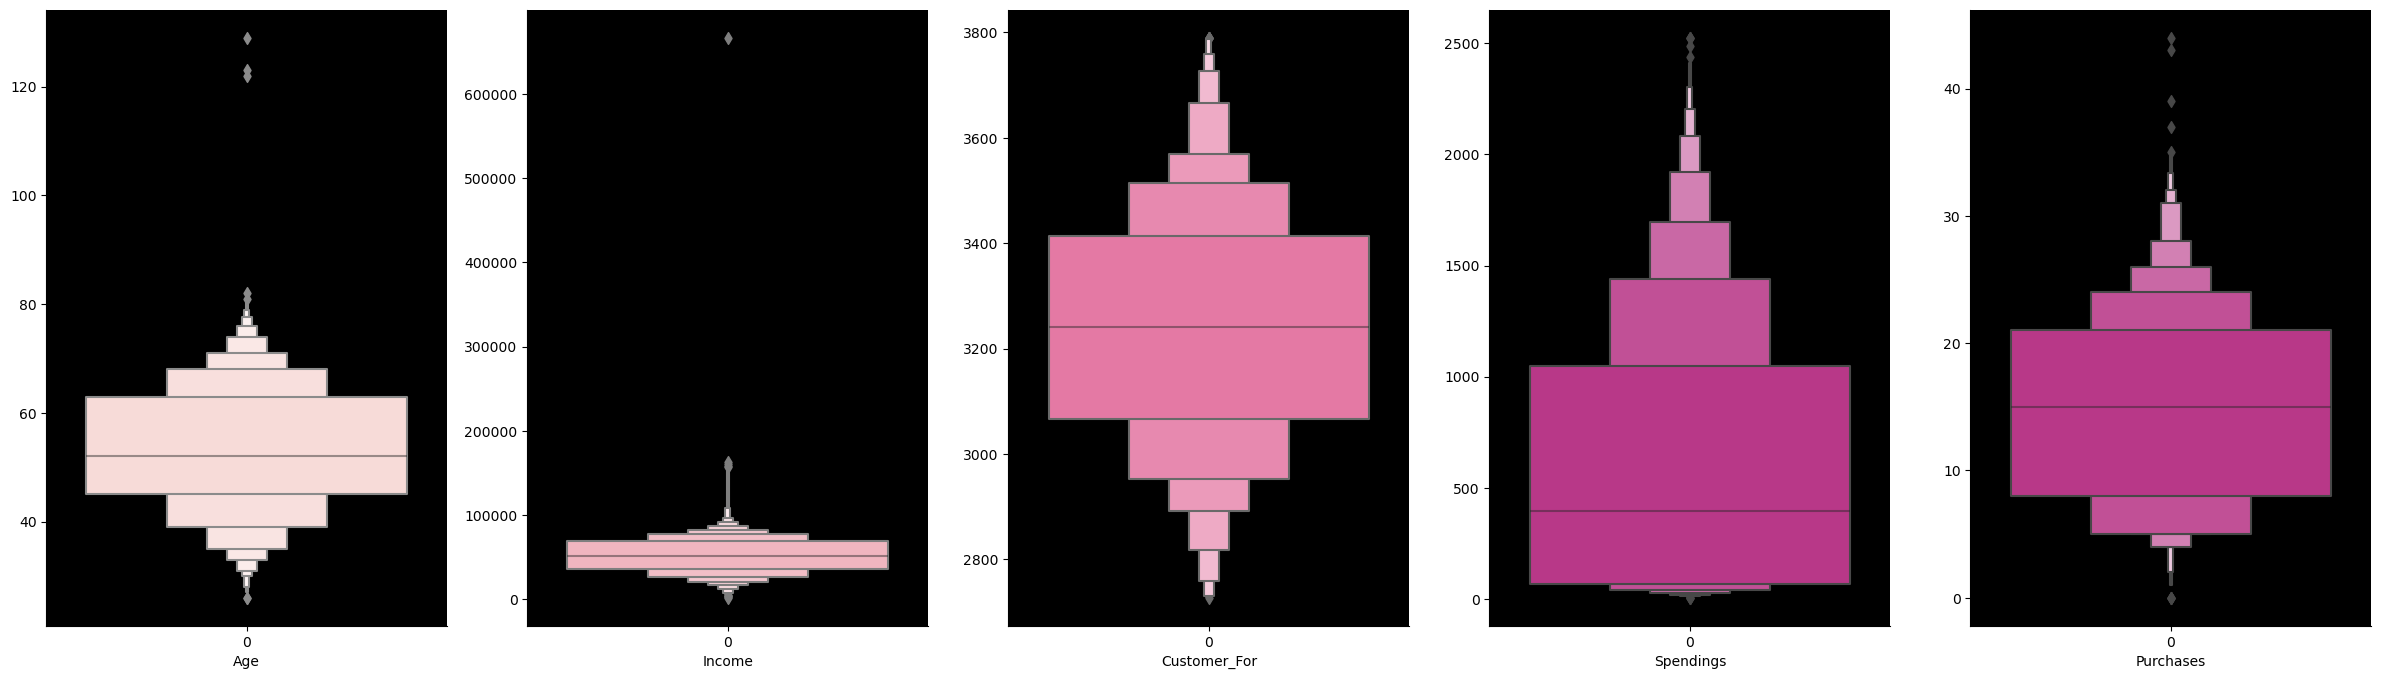

In [17]:
#examine the boxplots of different features
features= ["Age", "Income", "Customer_For", "Spendings", "Purchases"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=DF[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

In [18]:
#checking the number of outliers in age and income
print("Number of customers above the age of 100= ", len(DF[DF["Age"]>100]))
print("Number of customers with income above 200,000= ", len(DF[DF["Income"]>200000]))
DF= DF.drop(DF[(DF["Age"]>100) | (DF["Income"]>200000)].index)
print("Current data points count= ",len(DF))

Number of customers above the age of 100=  3
Number of customers with income above 200,000=  1
Current data points count=  2212


In [19]:
DF_COPY = DF.copy()

# Encoding Categorical Features

In [20]:
#label encode education
encoder= LabelEncoder()
DF["Education"]= DF[["Education"]].apply(encoder.fit_transform)

#hot encode marital_status
DF = pd.get_dummies(DF)

#check data
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2212 non-null   int32  
 1   Income                 2212 non-null   float64
 2   Recency                2212 non-null   int64  
 3   MntWines               2212 non-null   int64  
 4   MntFruits              2212 non-null   int64  
 5   MntMeatProducts        2212 non-null   int64  
 6   MntFishProducts        2212 non-null   int64  
 7   MntSweetProducts       2212 non-null   int64  
 8   MntGoldProds           2212 non-null   int64  
 9   NumDealsPurchases      2212 non-null   int64  
 10  NumWebPurchases        2212 non-null   int64  
 11  NumCatalogPurchases    2212 non-null   int64  
 12  NumStorePurchases      2212 non-null   int64  
 13  NumWebVisitsMonth      2212 non-null   int64  
 14  AcceptedCmp3           2212 non-null   int64  
 15  Acce

# Feature Scaling

In [21]:
#scale features
scaler= StandardScaler()
DF = pd.DataFrame(scaler.fit_transform(DF),columns = DF.columns)

#check
DF.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Marital_Status_Single,Marital_Status_Taken
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,...,2.375425,1.018352,-1.264598,-1.758359,1.973583,1.676245,1.317945,-0.43916,1.349603,-1.349603
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,...,-0.420977,1.274785,1.404572,0.449070,-1.665144,-0.963297,-1.159273,-0.43916,1.349603,-1.349603
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,...,-0.420977,0.334530,-1.264598,-0.654644,-0.172664,0.280110,0.796425,-0.43916,-0.740959,0.740959
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,...,-0.420977,-1.289547,0.069987,0.449070,-1.923210,-0.920135,-0.898513,-0.43916,-0.740959,0.740959
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,...,-0.420977,-1.033114,0.069987,0.449070,-0.822130,-0.307562,0.535666,-0.43916,-0.740959,0.740959


In [22]:
DFF = DF.copy()

# Data Clustering without PCA

Text(0, 0.5, 'Inertia')

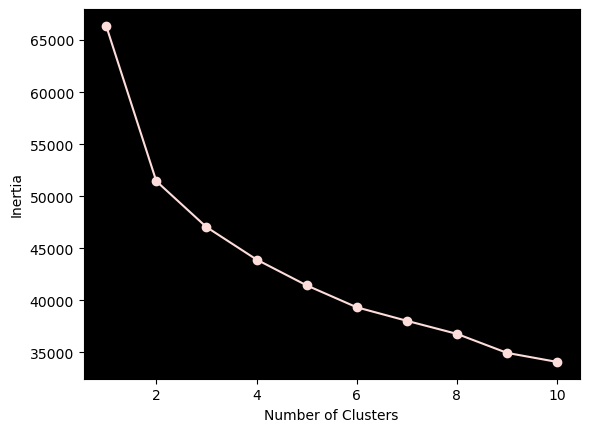

In [23]:
inertia = []
list_clusters = list(range(1,11))
for k in list_clusters:
    km = KMeans(k)
    km.fit(DF)
    inertia.append(km.inertia_)
    
plt.scatter([i for i in range (1,11,1)],inertia)
plt.plot([i for i in range (1,11,1)],inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [24]:
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)
db = DBSCAN(eps = 0.5, min_samples = 2)

hac.fit(DF)
km.fit(DF)
gm.fit(DF)
db.fit(DF)

DF["gm"] = gm.predict(DF)
DF["hac"] = hac.labels_
DF["km"] = km.labels_
DF["db"] = db.labels_

score_gm = silhouette_score(DF,DF["gm"])
score_hac = silhouette_score(DF,DF["hac"])
score_km = silhouette_score(DF,DF["km"])
score_db = silhouette_score(DF,DF["db"])

print("score of GMM = ",score_gm)
print("score of HAC = ",score_hac)
print("score of DBSCAN = ",score_db)
print("score of KMeans = ",score_km)

score of GMM =  -0.18179208902162183
score of HAC =  -0.0708436209663415
score of DBSCAN =  0.0750377911444182
score of KMeans =  -0.002583131166932606


# Dimensionality Reduction

In [32]:
pca = PCA(n_components = 3)
pca.fit(DFF)
reduced_DFF = pd.DataFrame(pca.transform(DFF))

print("Current number of features= ",len(reduced_DFF.columns))

Current number of features=  3


# Data Clustering with PCA

Text(0, 0.5, 'Inertia')

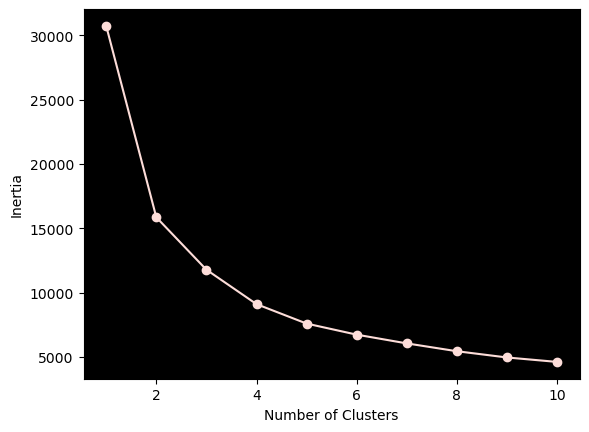

In [33]:
inertia = []
list_clusters = list(range(1,11))
for k in list_clusters:
    km = KMeans(k)
    km.fit(reduced_DFF)
    inertia.append(km.inertia_)
    
plt.scatter([i for i in range (1,11,1)],inertia)
plt.plot([i for i in range (1,11,1)],inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [34]:
hac = AgglomerativeClustering(8)
km = KMeans(8)
gm = GaussianMixture(8)
db = DBSCAN(eps = 0.5, min_samples = 5)

hac.fit(reduced_DFF)
km.fit(reduced_DFF)
gm.fit(reduced_DFF)
db.fit(reduced_DFF)

DF["gm"] = gm.predict(reduced_DFF)
DF["hac"] = hac.labels_
DF["km"] = km.labels_
DF["db"] = db.labels_

score_gm = silhouette_score(DF,DF["gm"])
score_hac = silhouette_score(DF,DF["hac"])
score_km = silhouette_score(DF,DF["km"])
score_db = silhouette_score(DF,DF["db"])

print("score of GMM = ",score_gm)
print("score of HAC = ",score_hac)
print("score of DBSCAN = ",score_db)
print("score of KMeans = ",score_km)

score of GMM =  0.14407545015104928
score of HAC =  0.15511026092633057
score of DBSCAN =  -0.016078477202007575
score of KMeans =  0.17640562473625396
